In [12]:
# There is a file with the same name of this lab but (HARDWARE) in title for using CW-Nano/CW-Lite/CW-Pro
# There is a file with the same name of this lab but (SIMULATED) in title for using recorded data
#raise NotImplementedError("Insert code from (HARDWARE) or (SIMULATED) Notebook Here")
import numpy as np
from tqdm import tnrange


data_path ='/home/mabon/Frequency/Datasets/Power/stm/FEATURED.npz'
trace_num = 15000
whole_pack = np.load(data_path)


try:
    trace_array_main, textin_array, key = whole_pack['power_trace'], whole_pack['plain_text'], whole_pack['key']
except Exception:
    trace_array_main, textin_array, key = whole_pack['trace_mat'], whole_pack['textin_mat'], whole_pack['key']
trace_array_main = trace_array_main[:trace_num, :]
textin_array = textin_array[:trace_num, :]

print(trace_array_main.shape)
print(textin_array.shape)

(15000, 100)
(15000, 16)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

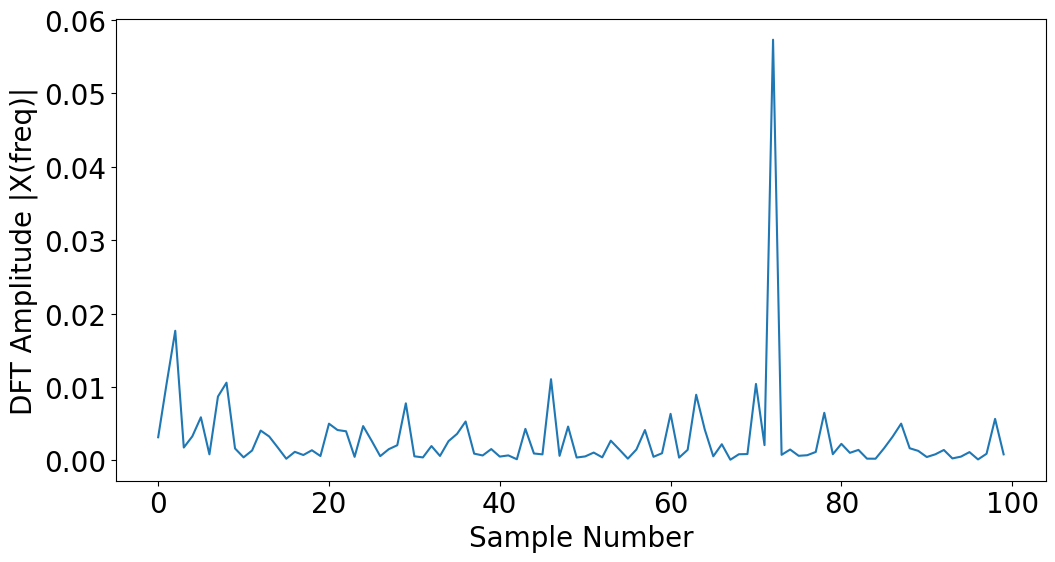

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(trace_array_main[1])
plt.xlabel('Sample Number',fontsize=20)
plt.ylabel('DFT Amplitude |X(freq)|',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


In [14]:


hex_key = [hex(b_val) for b_val in key]
print(hex_key)

# ###################
# Add your code here
# ###################
# raise NotImplementedError("Add your code here, and delete this.")
sbox = [
    # 0    1    2    3    4    5    6    7    8    9    a    b    c    d    e    f 
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76, # 0
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0, # 1
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15, # 2
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75, # 3
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84, # 4
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf, # 5
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8, # 6
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2, # 7
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73, # 8
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb, # 9
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79, # a
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08, # b
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a, # c
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e, # d
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf, # e
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16  # f
]

def aes_internal(inputdata, key):
    key = int(key)
    inputdata = int(inputdata)
    return sbox[inputdata ^ key]

def calc_hamming_weight(n):
    return bin(n).count("1")

HW = []
for i in range(0, 256):
    hw_val = calc_hamming_weight(i)
    HW.append(hw_val)    


['0x2b', '0x7e', '0x15', '0x16', '0x28', '0xae', '0xd2', '0xa6', '0xab', '0xf7', '0x15', '0x88', '0x9', '0xcf', '0x4f', '0x3c']


✔️ OK to continue!


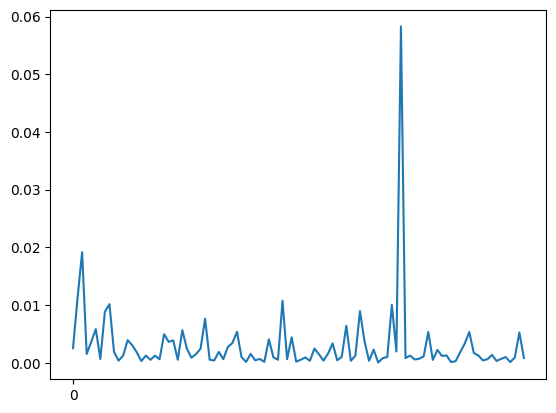

In [15]:
import os
assert HW[aes_internal(0xA1, 0x79)] == 3
assert HW[aes_internal(0x22, 0xB1)] == 5
print("✔️ OK to continue!")
import matplotlib.pylab as plt
from matplotlib.pyplot import MultipleLocator

x_locator = MultipleLocator(2500)
ax = plt.gca()
ax.xaxis.set_major_locator(x_locator)

plt.plot(trace_array_main[0])
f_name="Traces"
# trace_nm = os.path.join(pltpath, f_name + "-plot.png")
# if not os.path.isdir(pltpath):
#     os.makedirs(pltpath)
# plt.savefig(trace_nm, dpi=150, bbox_inches='tight')
plt.show()

In [16]:
def mean(X):
    # raise NotImplementedError("Add your code here, and delete this.")
    return np.mean(X, axis=0)

def std_dev(X, X_bar):
    # raise NotImplementedError("Add your code here, and delete this.")
    mean_x = X - X_bar
    x_square = []
    for i in range(X.shape[0]):
        tmp = mean_x[i, :]
        tmp_2 = np.square(tmp)
        x_square.append(tmp_2)

    x_square = np.array(x_square)
    sum_x_square = np.sum(x_square, axis=0)
    x_sqrt = np.sqrt(sum_x_square)
    return x_sqrt
    
def cov(X, X_bar, Y, Y_bar):
    # raise NotImplementedError("Add your code here, and delete this.")
    mean_x = X - X_bar
    mean_y = Y - Y_bar
    product_x_y = mean_x * mean_y
    sum_res = np.sum(product_x_y, axis=0)
    return sum_res

In [17]:
a = np.array([[5, 3, 4, 4, 5, 6],
             [27, 2, 3, 4, 12, 6],
              [1, 3, 5, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
             ]).transpose()
a_bar = mean(a)
b = np.array([[5, 4, 3, 2, 1, 3]]).transpose()
b_bar = mean(b)

o_a = std_dev(a, a_bar)
o_b = std_dev(b, b_bar)

ab_cov = cov(a, a_bar, b, b_bar)

In [18]:
assert (a_bar == np.array([4.5, 9., 4., 3.5])).all()
assert (b_bar == np.array([3.])).all()
assert (o_a[3] > 4.1833001 and o_a[3] < 4.1833002)
assert (o_b[0] > 3.162277 and o_b[0] < 3.162278)
assert (ab_cov == np.array([-1., 28., -9., -10.])).all()
print("✔️ OK to continue!")
print(trace_array_main.shape)

✔️ OK to continue!
(15000, 100)


In [19]:
v1=[]
v2=[]
v3=[]
v4=[]

In [20]:

for i in tnrange(100):

    maxcpa = [0] * 256
    trace_array=trace_array_main[:,i:i+1]
    # we don't need to redo the mean and std dev calculations 
    # for each key guess
    t_bar = mean(trace_array) 
    o_t = std_dev(trace_array, t_bar)

    for kguess in range(0, 256):
        hws = np.array([[HW[aes_internal(textin[0],kguess)] for textin in textin_array]]).transpose()

        # ###################
        # Add your code here
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(trace_array, t_bar, hws, hws_bar)
        cpaoutput = correlation / (o_t * o_hws)
        maxcpa[kguess] = max(abs(cpaoutput))

    guess = np.argmax(maxcpa)
    guess_corr = max(maxcpa)
        # ###################
        #raise NotImplementedError("Add your code here, and delete this.")
    v1.append(i)
    v2.append(hex(guess))
    v3.append(guess_corr)
    v4.append(hex_key[0])
#     print("Key guess: ", hex(guess))
#     print("tCorrelaion: ", guess_corr)
#     print("Correct Key: ", hex_key[0])

/home/mabon/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  """Entry point for launching an IPython kernel.


  0%|          | 0/100 [00:00<?, ?it/s]

In [49]:

# Create and open a text file in write mode
with open('cpa_results/fpga1_200k.txt', 'w') as file:
    for i in range(len(v1)):
        group = [v1[i], v3[i],v2[i], v4[i]]
        file.write(', '.join(map(str, group)) + '\n')

# Inform the user that the file has been created
print("Variables have been written to 'variables.txt' file.")

Variables have been written to 'variables.txt' file.


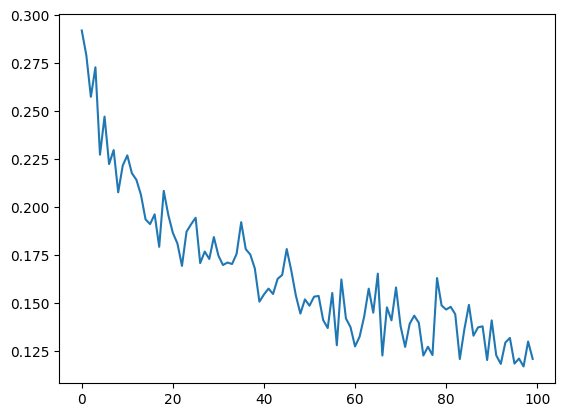

In [21]:
# plt1=[]
# for i in range(2181):
#     if (v2[i]==hex_key[0]):
#         plt1.append(v3[i])
#     else:
#         plt1.append(0)
        
plt.plot(v3)

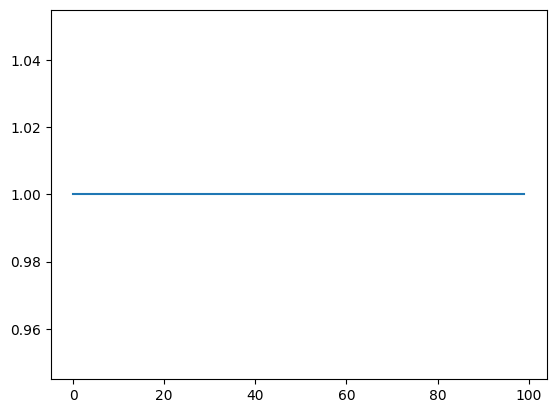

In [23]:
plt1=[]
for i in range(100):
    if (v2[i]==hex_key[0]):
        plt1.append(1)
    else:
        plt1.append(0)
plt.plot(plt1)        

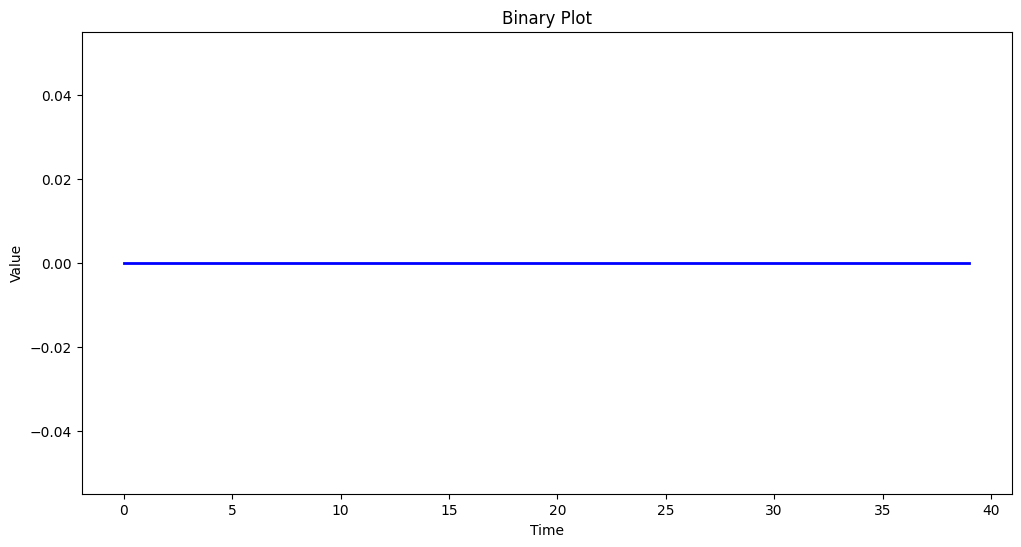

<Figure size 1200x600 with 0 Axes>

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
i=0
ax.step(range(len(plt1[i:i+500])), plt1[i:i+500], where='mid', color='b', linewidth=2)
# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Binary Plot')
plt.figure(figsize = (12, 6))
# Show the plot
plt.show()

In [53]:
# Find the maximum value in a list
max_value =(max(v1))

# Find the index of the maximum value in a list
max_index = v1.index(max_value)

In [54]:
v2


['0xd1',
 '0xfd',
 '0x35',
 '0x47',
 '0x4a',
 '0x4a',
 '0xa9',
 '0xa',
 '0x25',
 '0xfd',
 '0xb8',
 '0x9a',
 '0x4d',
 '0x70',
 '0x2f',
 '0xa9',
 '0x4a',
 '0x4a',
 '0x6a',
 '0xc2',
 '0x95',
 '0x78',
 '0xfd',
 '0x47',
 '0x47',
 '0xf6',
 '0x7',
 '0xca',
 '0xfd',
 '0x70',
 '0xfd',
 '0xbf',
 '0x73',
 '0x81',
 '0x70',
 '0x12',
 '0x16',
 '0x4a',
 '0xce',
 '0xde',
 '0xf8',
 '0x9b',
 '0x65',
 '0x92',
 '0x25',
 '0x35',
 '0xfd',
 '0xd3',
 '0xca',
 '0x98',
 '0xfd',
 '0xfd',
 '0xfe',
 '0x70',
 '0xf6',
 '0x66',
 '0xd',
 '0x91',
 '0x70',
 '0x1c',
 '0xde',
 '0x3d',
 '0x1b',
 '0x65',
 '0x3d',
 '0xbf',
 '0xaf',
 '0xde',
 '0x39',
 '0xf8',
 '0x25',
 '0xfd',
 '0x79',
 '0xe3',
 '0x70',
 '0xf6',
 '0xf6',
 '0xb8',
 '0x10',
 '0xb8',
 '0x15',
 '0xa',
 '0xf0',
 '0xa3',
 '0xfd',
 '0x9d',
 '0x79',
 '0x35',
 '0xfd',
 '0xe4',
 '0xeb',
 '0x25',
 '0xe6',
 '0x79',
 '0x24',
 '0xfd',
 '0x74',
 '0xb4',
 '0xb8',
 '0x38']